In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as signal

In [55]:
dados = pd.read_csv("AV1.CSV.xls", sep=";", skiprows=1)

print(dados)

dados['TEMPO[ms]'] = pd.to_numeric(dados['TEMPO[ms]'], errors='coerce')
dados['RPM'] = pd.to_numeric(dados['RPM'], errors='coerce')
dados['VELOCIDADE[km/h]'] = pd.to_numeric(dados['VELOCIDADE[km/h]'], errors='coerce')

tempo = dados['TEMPO[ms]'].to_numpy()
rpm = dados['RPM'].to_numpy()
velocidade = dados['VELOCIDADE[km/h]'].to_numpy()

        INDICE  TEMPO[ms]          RPM  VELOCIDADE[km/h]  Unnamed: 4
0            0          0     0.000000          0.000000         NaN
1            1          2     0.000000          0.000000         NaN
2            2          7     0.000000          0.000000         NaN
3            3         12     0.000000          0.000000         NaN
4            4         17     0.000000          0.000000         NaN
...        ...        ...          ...               ...         ...
181905  181905     811251  1655.492065          1.657537         NaN
181906  181906     811256  1655.492065          1.657537         NaN
181907  181907     811261  1695.585815          1.657537         NaN
181908  181908     811266  1695.585815          1.657537         NaN
181909  181909     811271  1695.585815          1.657537         NaN

[181910 rows x 5 columns]


In [73]:
rpm = np.abs(rpm)
velocidade = np.abs(velocidade)

1538.5378230962901


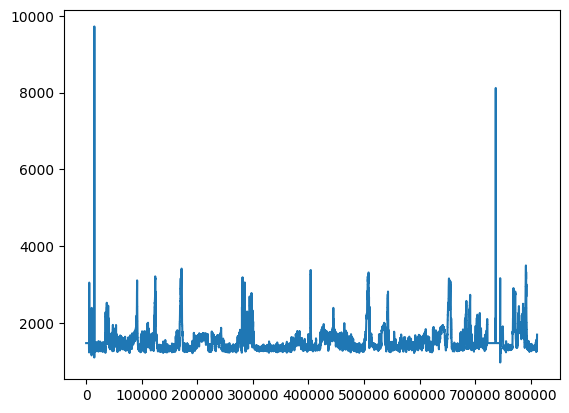

In [76]:
plt.plot(tempo, rpm)

rpm[rpm < 100] = np.mean(rpm)

print(np.mean(rpm))

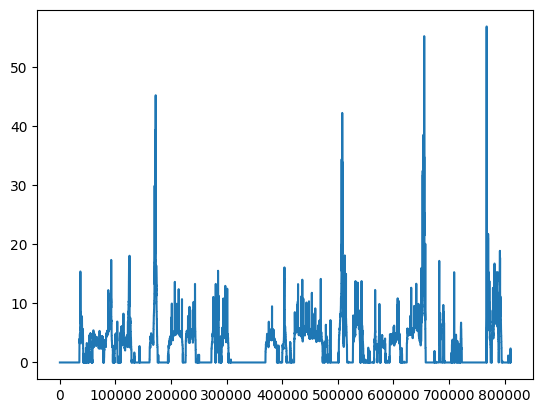

In [58]:
plt.plot(tempo, velocidade)

In [16]:
# tirando fft:

dft_rpm = np.fft.fft(rpm)
dft_rpm = np.abs(dft_rpm)


181910


<StemContainer object of 3 artists>

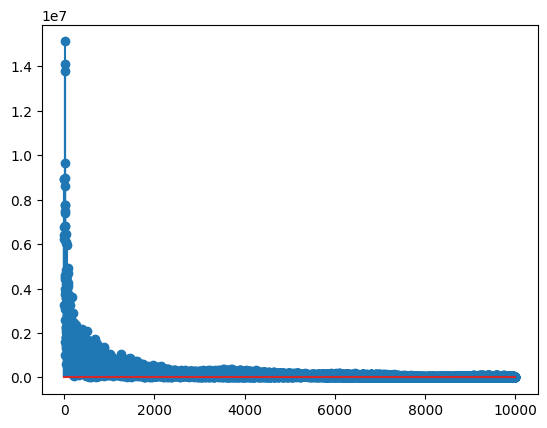

In [34]:
print(len(dft_rpm))
plt.stem(dft_rpm[1:10000]) # tem 180000 componentes no total

In [217]:
numero_de_corte = 45000
range_inicial = 36000
range_final = 40000

1 0.12368753779341432


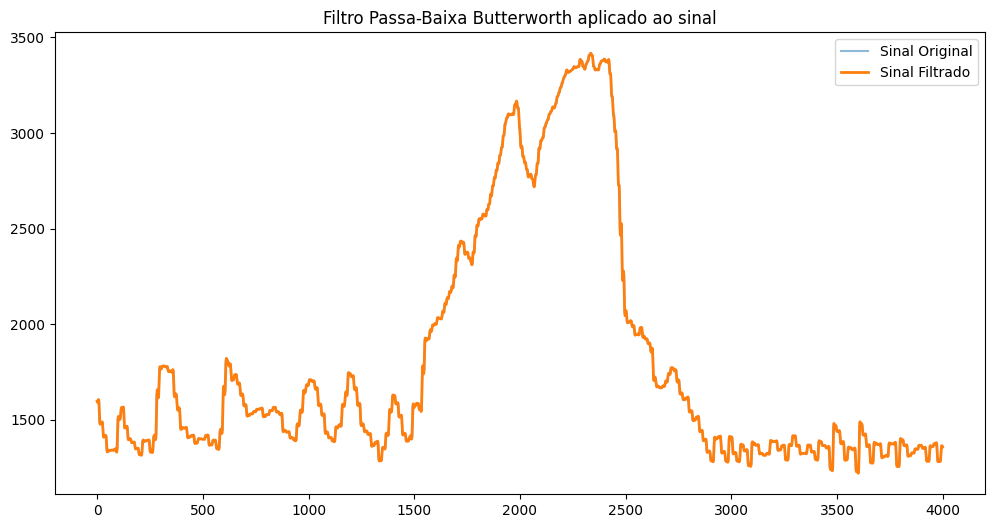

In [218]:
N = len(rpm)

signal_data = rpm
# Removendo a média para evitar pico em k=0
# signal_data -= np.mean(signal_data)

# Frequência de amostragem (hipotética)
fs = 1
fc = numero_de_corte / len(rpm) * (fs / 2)  # Definindo o corte com base nos 4000 pontos úteis

print(fs, fc)

order = 8
b, a = signal.butter(order, fc, btype='low', fs=fs)

# Aplicação do filtro
filtered_signal = signal.filtfilt(b, a, signal_data)


# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(signal_data[range_inicial:range_final], label="Sinal Original", alpha=0.5)
plt.plot(filtered_signal[range_inicial:range_final], label="Sinal Filtrado", linewidth=2)
plt.legend()
plt.title("Filtro Passa-Baixa Butterworth aplicado ao sinal")
plt.show()

rpm_filtrada = filtered_signal

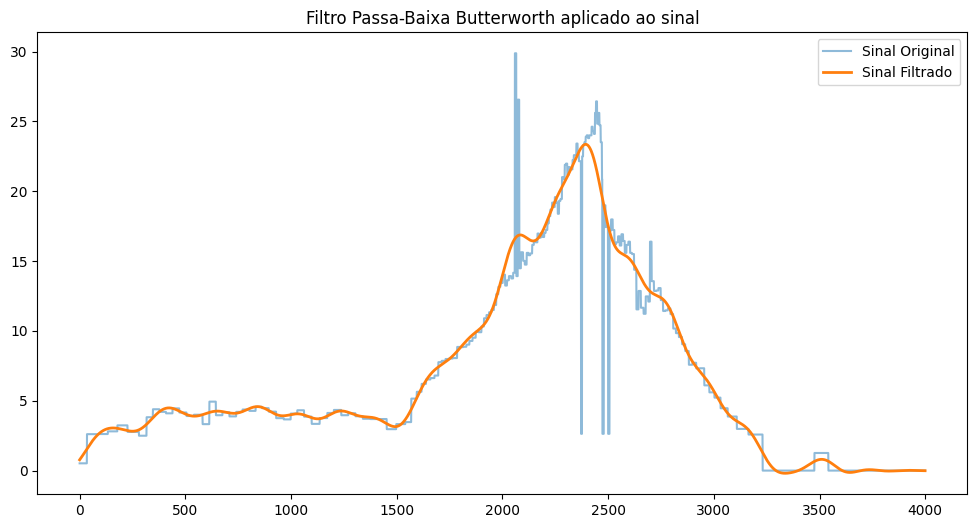

In [219]:

signal_data = velocidade
# Removendo a média para evitar pico em k=0
# signal_data -= np.mean(signal_data)

# Frequência de amostragem (hipotética)
fs = 1
fc = 2000 / len(rpm) * (fs / 2)  # Definindo o corte com base nos 4000 pontos úteis

order = 8
b, a = signal.butter(order, fc, btype='low', fs=fs)

# Aplicação do filtro
filtered_signal = signal.filtfilt(b, a, signal_data)

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(signal_data[range_inicial:range_final], label="Sinal Original", alpha=0.5)
plt.plot(filtered_signal[range_inicial:range_final], label="Sinal Filtrado", linewidth=2)
plt.legend()
plt.title("Filtro Passa-Baixa Butterworth aplicado ao sinal")
plt.show()

velocidade_filtrada = filtered_signal


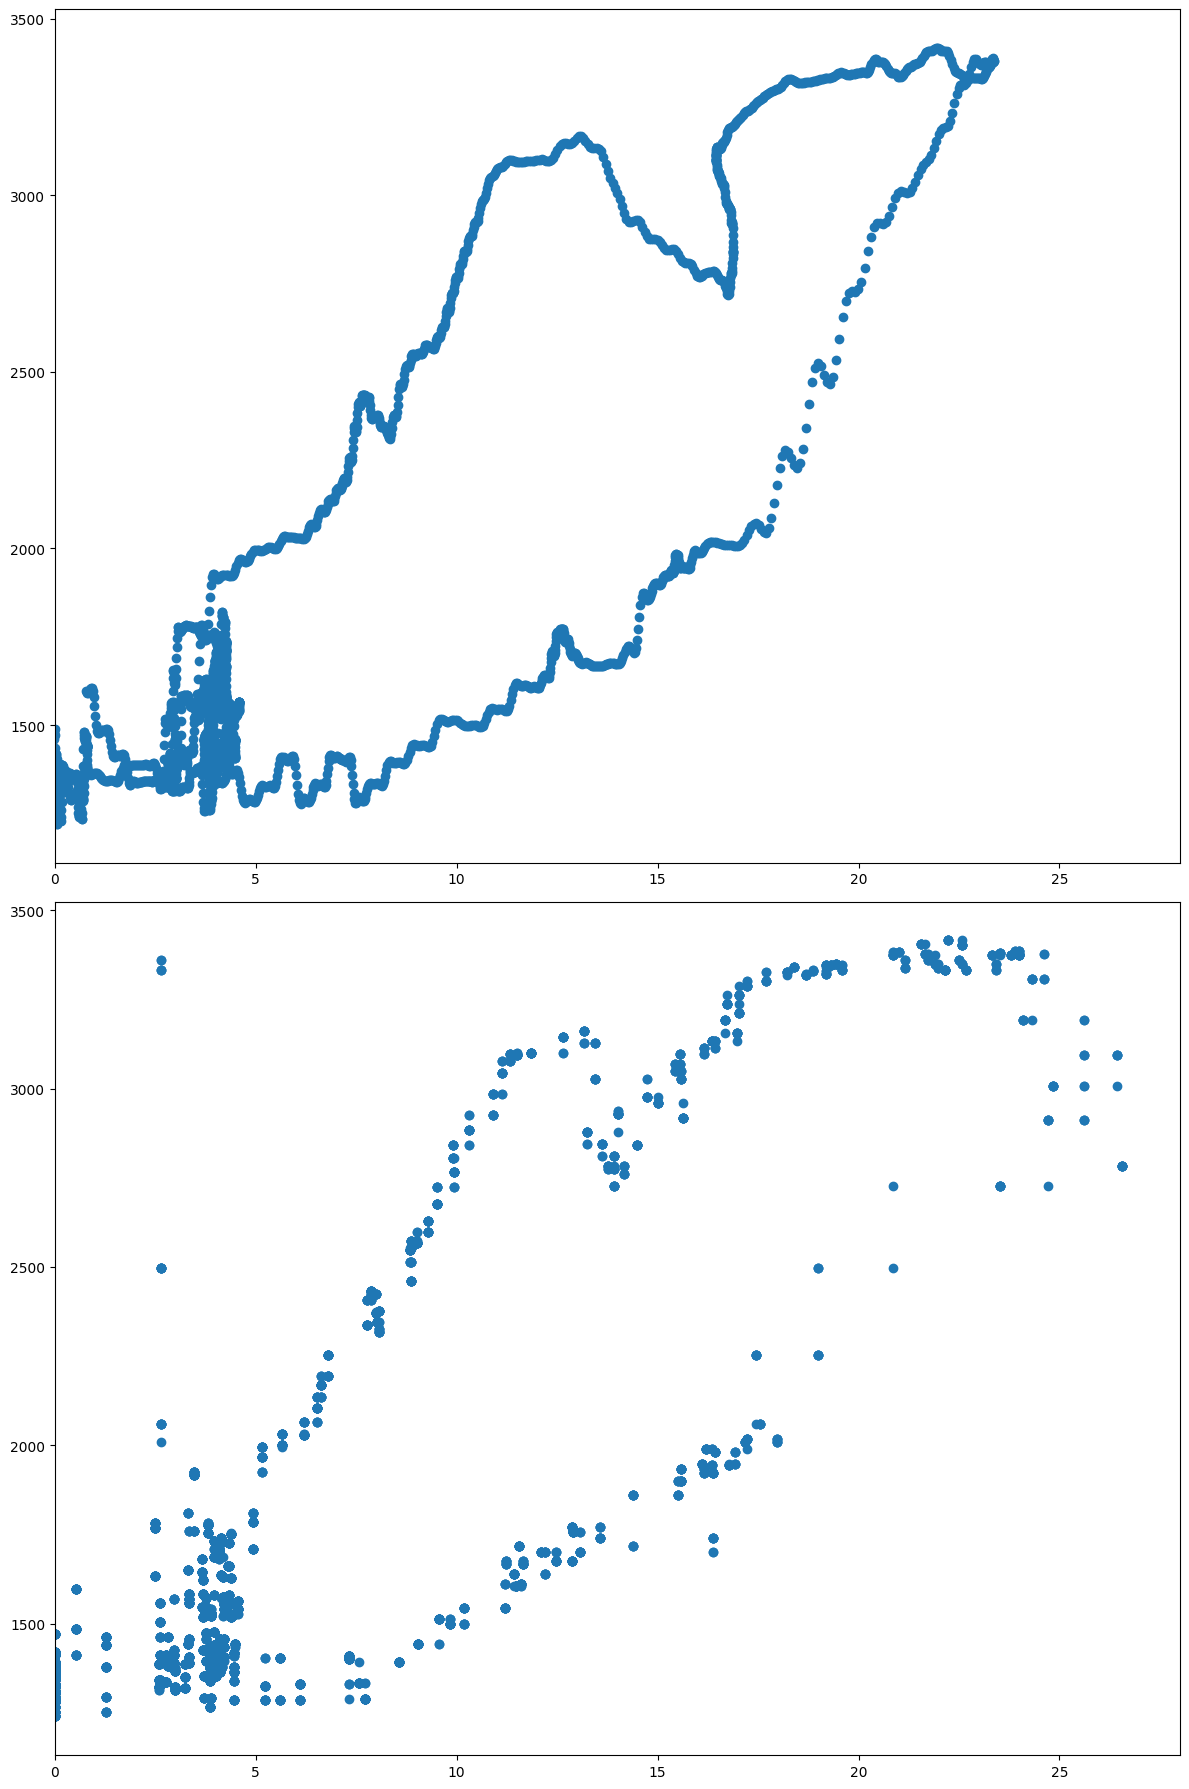

In [220]:

plt.figure(figsize=(12, 18))
plt.subplot(211)
plt.scatter(velocidade_filtrada[range_inicial: range_final], rpm_filtrada[range_inicial: range_final])
plt.xlim(0, 28)
# plt.show()

plt.subplot(212)
plt.xlim(0, 28)
# velocidade[velocidade >30] = np.mean(velocidade)

plt.scatter(velocidade[range_inicial: range_final], rpm[range_inicial: range_final])
plt.tight_layout()
plt.show()

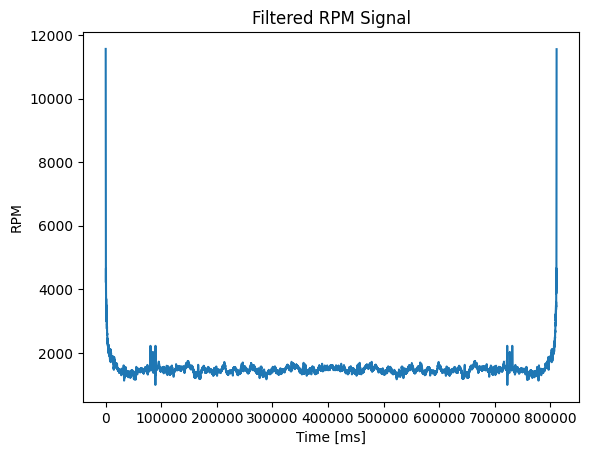

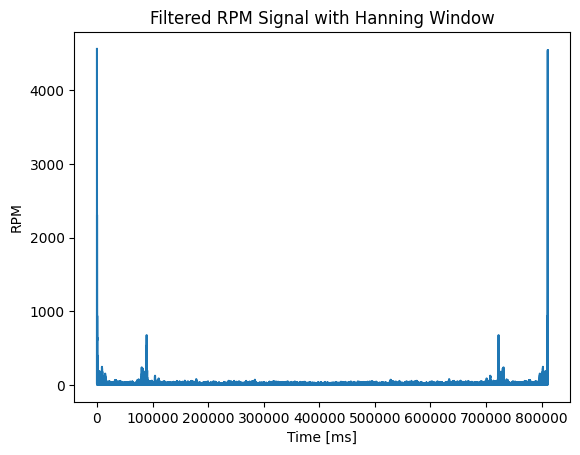

In [221]:
# plt.stem(dft_rpm[1:10000])

# Design a low-pass filter to keep only the first 4000 frequency components
dft_rpm_filtered = np.zeros_like(dft_rpm)
dft_rpm_filtered[:4000] = dft_rpm[:4000]

# Perform the inverse FFT to get the filtered signal back in time domain
rpm_filtered = np.fft.ifft(dft_rpm_filtered)

# Plot the filtered signal
plt.figure()
plt.plot(tempo, np.abs(rpm_filtered))
plt.title('Filtered RPM Signal')
plt.xlabel('Time [ms]')
plt.ylabel('RPM')
plt.show()


# Design a low-pass filter using Hanning window
N = 4000  # Number of frequency components to keep
hanning_window = np.hanning(N * 2)  # Create a Hanning window of size 2N
low_pass_filter = np.zeros_like(dft_rpm)
low_pass_filter[:N] = hanning_window[:N]
low_pass_filter[-N:] = hanning_window[N:]

# Apply the filter to the DFT of the RPM signal
dft_rpm_filtered_hanning = dft_rpm * low_pass_filter

# Perform the inverse FFT to get the filtered signal back in time domain
rpm_filtered_hanning = np.fft.ifft(dft_rpm_filtered_hanning)

# Plot the filtered signal
plt.figure()
plt.plot(tempo, np.abs(rpm_filtered_hanning))
plt.title('Filtered RPM Signal with Hanning Window')
plt.xlabel('Time [ms]')
plt.ylabel('RPM')
plt.show()